In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from decimal import Decimal

In [39]:
# define the cs coeficients
c0 = -3.1420310908E4
c1 =  4.4207693183E2
c2 =  -2.4555531077
c3 =  7.0411177557E-3
c4 =  -1.0353739103E-5
c5 =  6.1949139692E-9

In [61]:
# define the speed function in terms of temperature
def Speed(T):
    return c0 + c1*T + c2*T**2 + c3*T**3 + c4*T**4 + c5*T**5

T = np.linspace(283, 323, 10000)
Ti = 273 + 22
Tf = Ti + 1

# define the frequency function
def Frequency(v):
    return v / lambda_

res_freq = 1.8975 #value taken from the thesis
v = np.linspace(Speed(Ti) * 0.99, Speed(Tf) * 1.01, 10000)
lambda_ = Speed(Ti)/res_freq
print(lambda_*1E-6)
print(Speed(Ti))

0.0007841312870569753
1487.8891171906107


C:\Users\Phili\AppData\Local\Temp\ipykernel_8332\2132321750.py:14: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax[0].legend([r"$c_0(T)=P_5(T)$", "_", "_"])
C:\Users\Phili\AppData\Local\Temp\ipykernel_8332\2132321750.py:36: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax[1].legend([r"$f(c_0) = c_0 / \lambda$", "_", "_"],loc="upper right")


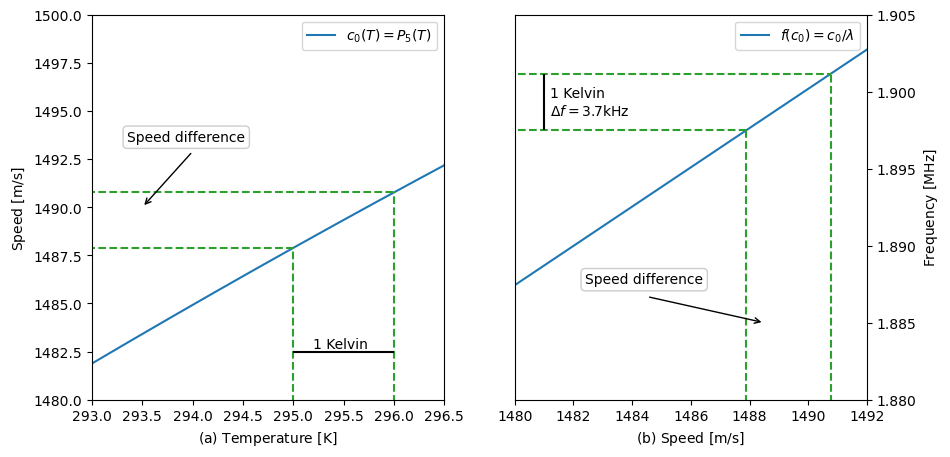

In [68]:
# crete sub plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(T, Speed(T))
ax[0].vlines(x=Ti, ymin=Speed(T[0]), ymax=Speed(Ti), color="tab:green", linestyles="dashed")
ax[0].vlines(x=Tf, ymin=Speed(T[0]), ymax=Speed(Tf), color="tab:green", linestyles="dashed")
ax[0].hlines(y=Speed(Ti), xmin=T[0], xmax=Ti, color="tab:green", linestyles="dashed")
ax[0].hlines(y=Speed(Tf), xmin=T[0], xmax=Tf, color="tab:green", linestyles="dashed")
ax[0].set_xlim(293,296.5)
ax[0].set_ylim(1480,1500)
ax[0].hlines(y=1482.5, xmin=Ti, xmax=Tf, color="black", linestyles="solid")
ax[0].text(295.2, 1482.7, "1 Kelvin", fontsize=10)
ax[0].set_xlabel(r'(a) Temperature [$\mathrm{K}$]')
ax[0].set_ylabel(r'Speed [$\mathrm{m/s}$]')
ax[0].legend([r"$c_0(T)=P_5(T)$", "_", "_"])

# plot th boxes
ax[0].text(0.1, 0.7, "Speed difference", transform=ax[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))
ax[0].annotate("", xy=(293.5, 1490), xytext=(294, 1492.9),
            arrowprops=dict(arrowstyle="->"))

ax[1].plot(Speed(T), Frequency(Speed(T)))
ax[1].vlines(x=Speed(Ti), ymin=Frequency(Speed(T))[0], ymax=Frequency(Speed(Ti)), color="tab:green", linestyles="dashed")
ax[1].vlines(x=Speed(Tf), ymin=Frequency(Speed(T))[0], ymax=Frequency(Speed(Tf)), color="tab:green", linestyles="dashed")
ax[1].hlines(y=Frequency(Speed(Ti)), xmin=Speed(T)[0], xmax=Speed(Ti), color="tab:green", linestyles="dashed")
ax[1].hlines(y=Frequency(Speed(Tf)), xmin=Speed(T)[0], xmax=Speed(Tf), color="tab:green", linestyles="dashed")
ax[1].set_xlim(1480,1492)
ax[1].set_ylim(1.88, 1.905)
ax[1].vlines(x=1481, ymin=Frequency(Speed(Ti)), ymax=Frequency(Speed(Tf)), color="black", linestyles="solid")
#string = f"{Decimal(str(Frequency(Speed(Tf)) - Frequency(Speed(Ti)))):.1E}" + r"$\mathrm{MHz}$"
ax[1].text(1481.2, 1.8985, '\n'.join((r"1 Kelvin", r"$\Delta f =$" + "3.7" + r"$\mathrm{kHz}$")), fontsize=10)
ax[1].set_xlabel(r'(b) Speed [$\mathrm{m/s}$]')
ax[1].set_ylabel(r'Frequency [$\mathrm{MHz}$]')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].legend([r"$f(c_0) = c_0 / \lambda$", "_", "_"],loc="upper right")

# plot the boxes
ax[1].text(0.2, 0.33, "Speed difference", transform=ax[1].transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))
ax[1].annotate("", xy=(1488.5, 1.885), xytext=(1484.5, 1.8867),
            arrowprops=dict(arrowstyle="->"))

plt.savefig(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Images for Overleaf\Temeparature dependence.png', dpi=350,bbox_inches = "tight")


In [57]:
# speed difference
speed_difference = Speed(Tf) - Speed(Ti)
print("Speed difference =" + str(round(speed_difference,2)))

Speed difference =2.88


In [65]:
# increase in frequency
round(Frequency(Speed(Tf)),4)

1.9012